<a href="https://colab.research.google.com/github/sladem-tox/PK_calcs/blob/main/PlasmaTime_SingleIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single IV Elimination Plasma-time Curve
`Page by Dr Slade Matthews, The University of Sydney, 2023`

Follows the formula:\begin{equation} C = C_0 * e^{-kt} \end{equation}

In the code below you can change the drug parameters **dose**, **Cl**, and **Vd**.

The initial drug plasma concentration for an IV dose is given by:
\begin{equation} C_0 = \frac{dose}{Vd} \end{equation}

The formula for the constant "k" is given by:
\begin{equation} k = \frac{Cl}{Vd} \end{equation}




In [1]:
############
#Insert Drug parameters, Cl = clearance (L/h), Vd = volume of distribution (L), and dose in mg.
dose =100
Cl =20
Vd =200
############

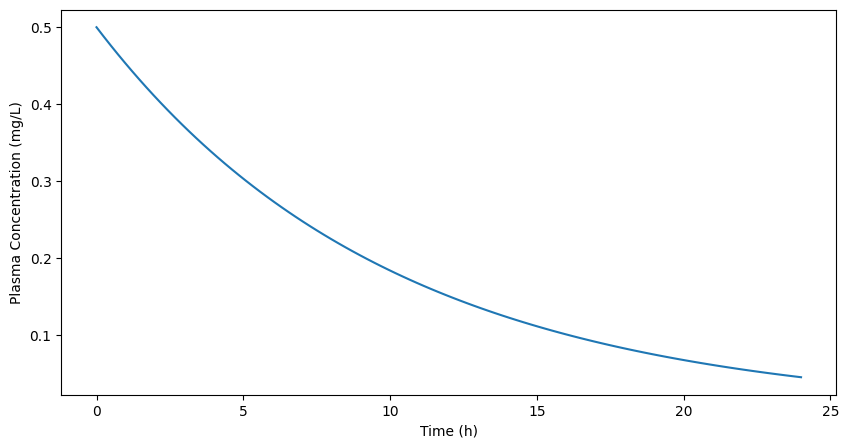

In [2]:
#############################################################
# DO NOT CHANGE THESE
#############################################################
# Initial concentration is dose over volume of distribution
ystart =dose/Vd

#The elimination rate constant is CL over Vd
k = Cl/Vd

import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 24, 100)
y = ystart * np.exp(-k*t)

fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(t, y)
plt.xlabel("Time (h)")
plt.ylabel("Plasma Concentration (mg/L)")

# Show the plot
plt.show()

The AUC can be calculated using the relationship:
\begin{equation} AUC = \frac{Dose}{Cl} \end{equation}

In [3]:
AUC = dose/Cl
print("The AUC is", AUC)


The AUC is 5.0


We can also determine the AUC by integrating the plasma-time curve as this is how it would be determined experimentally. Here we use trapezoidal Integration with to a set of x y coordinates determined using the formula for the IV plasma-time curve.

In [4]:
import numpy as np
def f1(t):
   return ystart * np.exp(-k*t)

t = np.linspace(0, 24, 1000)
#linspace here returns a evenly spaced set of 1000 values from 0 to 24 in an ndarray as used in the plot above.

y1 = f1(t)
#Ths line generates an ndarray "y1" from running the function "f1" on the t values in the array called "t"
from scipy import integrate
I1 = integrate.trapezoid(y1, t)
#This line performs trapezoidal integration by adding the series of trapazoids constructed from the arrays of x and y coordinates
print("The AUC from integration is", round(I1,4))

The AUC from integration is 4.5464


## The AUC from integration is not 5. Why?

In [5]:
# The trapezoidal rule can't go up to infinity because we can't keep making boxes for ever!
# The scipy has an integral function that can reach infinity.
import numpy as np
from scipy.integrate import quad
def integrand(t):
   return ystart * np.exp(-k*t)

k = Cl/Vd

I = quad(integrand, 0, np.inf)
I


(5.000000000000001, 5.093529727769217e-09)

The quad intergral (above) returns the inegral and an error estimate. Pretty small error and very close to exactly 5!

In [6]:
#You can plug any time value "t" into the equation to find the corresponding concentration value
conc = f1(20)
print("The plasma concentration at time t is:", round(conc,2), "mg/L")

The plasma concentration at time t is: 0.07 mg/L


The formula for half-life is given by:
\begin{equation} t_\frac{1}{2} = 0.693 * \frac{Vd}{Cl} \end{equation}


In [7]:
halflife = 0.693 * (Vd/Cl)
#print("The half-life for the drug is", halflife, "hours.")
print("The half-life for the drug is %.2f hours." % halflife)

The half-life for the drug is 6.93 hours.


In [8]:
#Calulate how many halflives have past at some timepoint and determine the plasma concentration remaining.
timepoint = 24
num_hfl = timepoint/halflife
remain = ystart / (2**num_hfl)
#print("At ",timepoint, "hours there will be ", round(remain,3), "mg/L remaining in the plasma.")

#print("At %i hours there will be %.3f mg/L remaining in the plasma" % (timepoint, remain))

print("At %.1f hours there will be %.3f mg/L remaining in the plasma" % (timepoint, remain))

At 24.0 hours there will be 0.045 mg/L remaining in the plasma


In [9]:
#Simple example of why 2 to the power of how many halflives determines the fraction remaining.
Czero = 50
remain = Czero / 2**3
remain
# Convince your self that 2 to the power of "how many half-lives" gives the fraction remaining.
#50 div 2 is 25 (2^1)
#25 div 2 is 12.5 (2^2)
#12.5 div 2 is 6.25 (2^3)

6.25